In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

In [2]:
sys.path.insert(1, '/Users/frederiekelohmann/Documents/FS2024/DSL/DSL_Quake_Fault_Reconstruction/benchmark/src')

from main import run_fault_reconstruction
from plotting import plot_components, make_3D_plot

In [3]:
from kernelparameters import KernelParameters

def filter_noise_pts(kernels: KernelParameters,
                     labels: np.ndarray):
    '''
    Creates a mask to filter all background points according to the given kernel configuration
    '''
    
    # retrieve the index of the background kernel
    noise_idx = np.arange(kernels.get_n_kernels())[kernels.get('ib')]

    return labels != noise_idx

## Load the data

In [68]:
dir = '/Users/frederiekelohmann/Documents/FS2024/DSL/DSL_Quake_Fault_Reconstruction/benchmark/data/'

bed_yfaults = pd.read_csv(dir+'bedretto_yfaults.csv').iloc[:,:3].to_numpy()

ladder_raw = pd.read_csv(dir+'bedretto_ladder.csv', delimiter = ' ', skiprows=1, header = None)
bed_ladder_time = ladder_raw[2]
bed_ladder_date = ladder_raw[1]
bed_ladder = ladder_raw[bed_ladder_date == '2022/06/22'][bed_ladder_time[bed_ladder_date == '2022/06/22']<'10:29:20.000'].iloc[:,3:6].to_numpy()  # first wave not noisy
bed_ladder_fw = ladder_raw[bed_ladder_date == '2022/06/22'][bed_ladder_time[bed_ladder_date == '2022/06/22']<'20:15:30.000'].iloc[:,3:6].to_numpy()  # first wave full
bed_ladder_sw = ladder_raw[bed_ladder_date == '2022/06/23'][bed_ladder_time[bed_ladder_date == '2022/06/23']>'05:40:00.000'].iloc[:,3:6].to_numpy()  # second wave full
bed_ladder_full = ladder_raw.iloc[:,3:6].to_numpy()

## Inspect the raw data

In [ ]:
dummy_labs = np.zeros(len(bed_yfaults), dtype = 'int') # we need some dummy labels for plotting
make_3D_plot(bed_yfaults, dummy_labs, marker_sz = 1.5)

In [9]:
dummy_labs = np.zeros(len(bed_ladder), dtype = 'int') # we need some dummy labels for plotting
make_3D_plot(bed_ladder, dummy_labs, marker_sz = 1.5)

(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: xlabel='PC 1', ylabel='PC 2'>,
         <Axes: xlabel='PC 3', ylabel='PC 2'>],
        [<Axes: xlabel='PC 1', ylabel='PC 3'>, <Axes: >]], dtype=object))

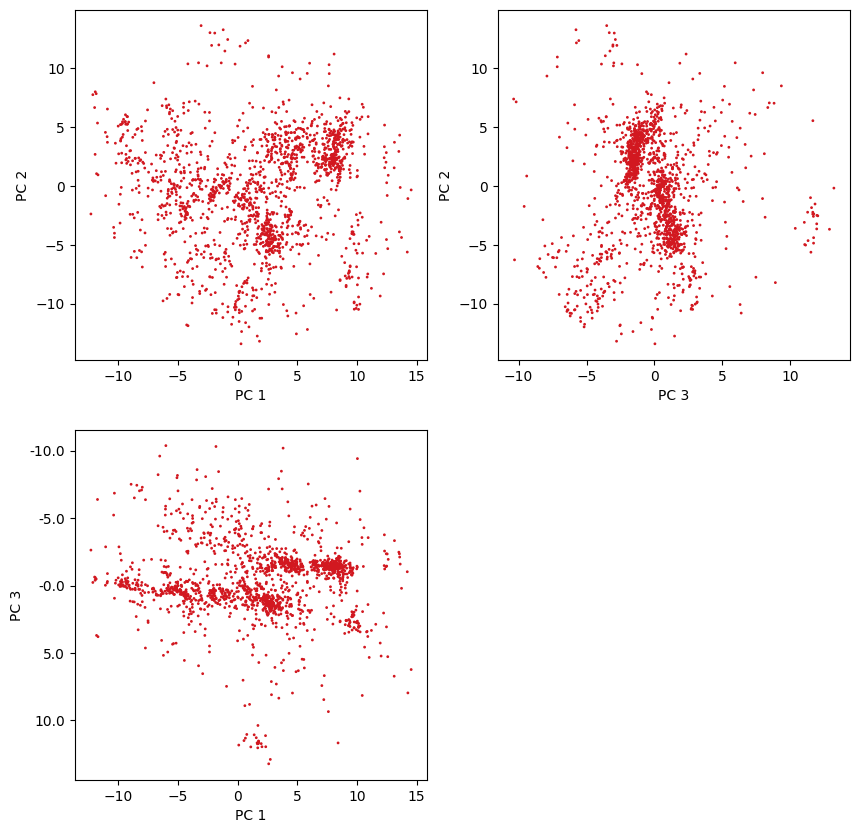

In [57]:
dummy_labs = np.zeros(len(bed_ladder_fw), dtype = 'int')
fig, axs = plot_components(bed_ladder_fw, dummy_labs, marker_sz=1, X_pca = bed_ladder_full)

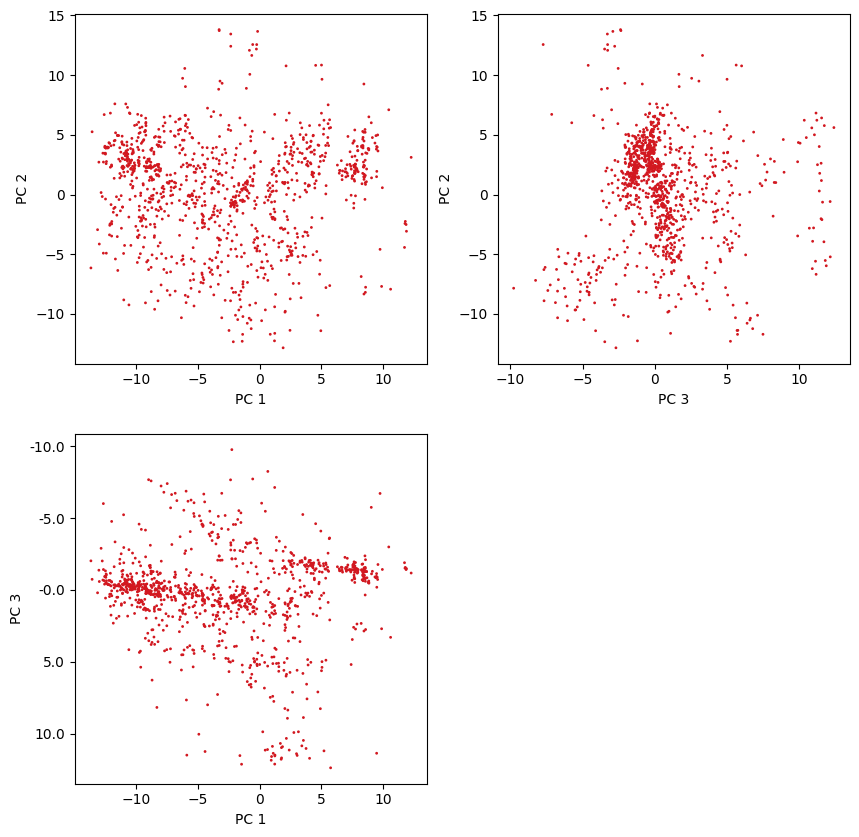

In [69]:
dummy_labs = np.zeros(len(bed_ladder_sw), dtype = 'int')
fig, axs = plot_components(bed_ladder_sw, dummy_labs, marker_sz=1, X_pca = bed_ladder_full)

In [11]:
kers_bed, labs_bed = run_fault_reconstruction(bed_yfaults, min_sz_cluster = 15)

Processing chunk 1/1 with 8013 points


KeyboardInterrupt: 

In [ ]:
make_3D_plot(bed_yfaults, labs_bed, marker_sz=1.5)

In [ ]:
np.arange(kers_bed.get_n_kernels())[kers_bed.is_bkg]

## Ladder structure

### Original Algorithm

In [84]:
kers_bed_ka, labs_bed_ka = run_fault_reconstruction(bed_ladder_fw, min_sz_cluster = 15)

Processing chunk 1/1 with 1624 points
  61/820 pairs have touching bbox
  Merged 7 pairs  >> 34 kernels left
  56/234 pairs have touching bbox
  Merged 5 pairs  >> 29 kernels left
  41/149 pairs have touching bbox
  Merged 4 pairs  >> 25 kernels left
  36/100 pairs have touching bbox
  Merged 4 pairs  >> 21 kernels left
  22/81 pairs have touching bbox
  Merged 3 pairs  >> 18 kernels left
  18/53 pairs have touching bbox
  Merged 3 pairs  >> 15 kernels left
  13/39 pairs have touching bbox
  Merged 3 pairs  >> 12 kernels left
  12/30 pairs have touching bbox
  Merged 1 pairs  >> 11 kernels left
  4/10 pairs have touching bbox
  Merged 1 pairs  >> 10 kernels left
  6/9 pairs have touching bbox
  Merged 1 pairs  >> 9 kernels left
  5/8 pairs have touching bbox
  Merged 1 pairs  >> 8 kernels left
  5/7 pairs have touching bbox
  Merged capacity kernels into 8 kernels
Combine results of all chunks
  5/28 pairs have touching bbox
Final number of kernels: 8


(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: xlabel='PC 1', ylabel='PC 2'>,
         <Axes: xlabel='PC 3', ylabel='PC 2'>],
        [<Axes: xlabel='PC 1', ylabel='PC 3'>, <Axes: >]], dtype=object))

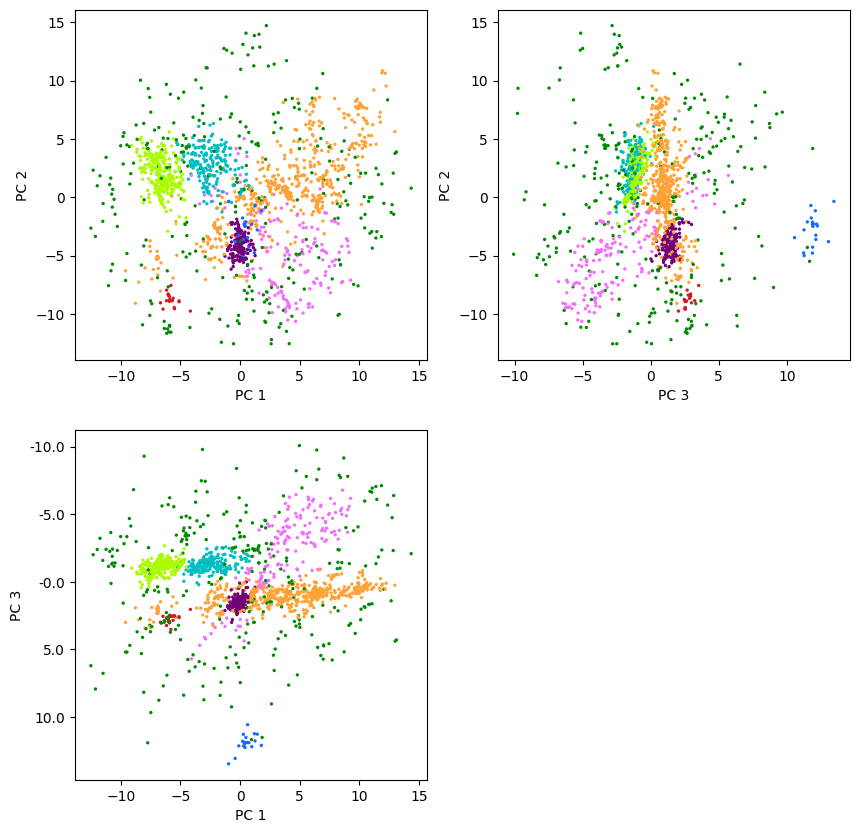

In [85]:
# Kamer min_cluster_sz = 15
plot_components(bed_ladder_fw, labs_bed_ka, marker_sz=2)

In [86]:
kers_bed_ka, labs_bed_ka = run_fault_reconstruction(bed_ladder_fw, min_sz_cluster = 10)

Processing chunk 1/1 with 1624 points
  Running in parallel
  95/1830 pairs have touching bbox
  Merged 13 pairs  >> 48 kernels left
  89/562 pairs have touching bbox
  Merged 6 pairs  >> 42 kernels left
  75/270 pairs have touching bbox
  Merged 7 pairs  >> 35 kernels left
  64/245 pairs have touching bbox
  Merged 6 pairs  >> 29 kernels left
  52/172 pairs have touching bbox
  Merged 3 pairs  >> 26 kernels left
  41/95 pairs have touching bbox
  Merged 4 pairs  >> 22 kernels left
  32/85 pairs have touching bbox
  Merged 4 pairs  >> 18 kernels left
  25/66 pairs have touching bbox
  Merged 3 pairs  >> 15 kernels left
  16/40 pairs have touching bbox
  Merged 3 pairs  >> 12 kernels left
  8/30 pairs have touching bbox
  Merged capacity kernels into 12 kernels
Combine results of all chunks
  9/66 pairs have touching bbox
Final number of kernels: 12


(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: xlabel='PC 1', ylabel='PC 2'>,
         <Axes: xlabel='PC 3', ylabel='PC 2'>],
        [<Axes: xlabel='PC 1', ylabel='PC 3'>, <Axes: >]], dtype=object))

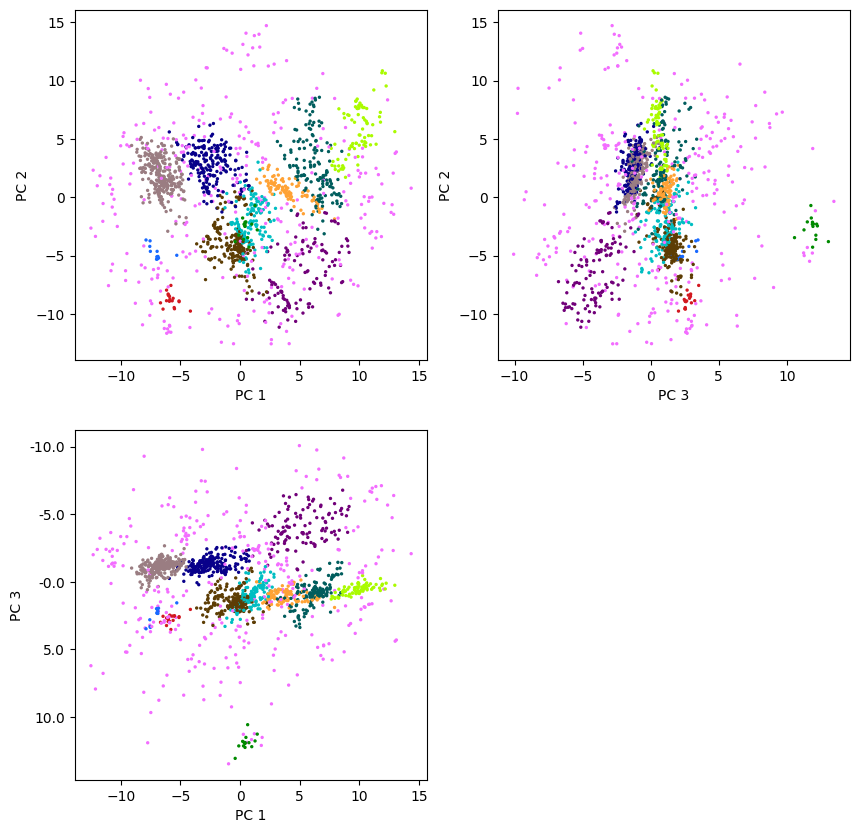

In [88]:
# Kamer min_cluster_sz = 10
plot_components(bed_ladder_fw, labs_bed_ka, marker_sz=2)

In [25]:
make_3D_plot(bed_ladder, labs_bed, marker_sz=1)

In [100]:
# margin scale 50, min_sz_cluster 15
kers_bed, labs_bed = run_fault_reconstruction(bed_ladder_fw, min_sz_cluster = 15, refit_kernels=True, margin_scale=60, visualize=False)

Processing chunk 1/1 with 1624 points
  61/820 pairs have touching bbox
  Merged 8 pairs  >> 33 kernels left
  36/241 pairs have touching bbox
  Merged 7 pairs  >> 26 kernels left
  20/155 pairs have touching bbox
  Merged 2 pairs  >> 24 kernels left
  6/45 pairs have touching bbox
  Removed 1/24 kernels with < 15 points
  Merged capacity kernels into 23 kernels
Combine results of all chunks
  28/253 pairs have touching bbox
  Merged 1 pairs  >> 22 kernels left
  4/21 pairs have touching bbox
Final number of kernels: 22


(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: xlabel='PC 1', ylabel='PC 2'>,
         <Axes: xlabel='PC 3', ylabel='PC 2'>],
        [<Axes: xlabel='PC 1', ylabel='PC 3'>, <Axes: >]], dtype=object))

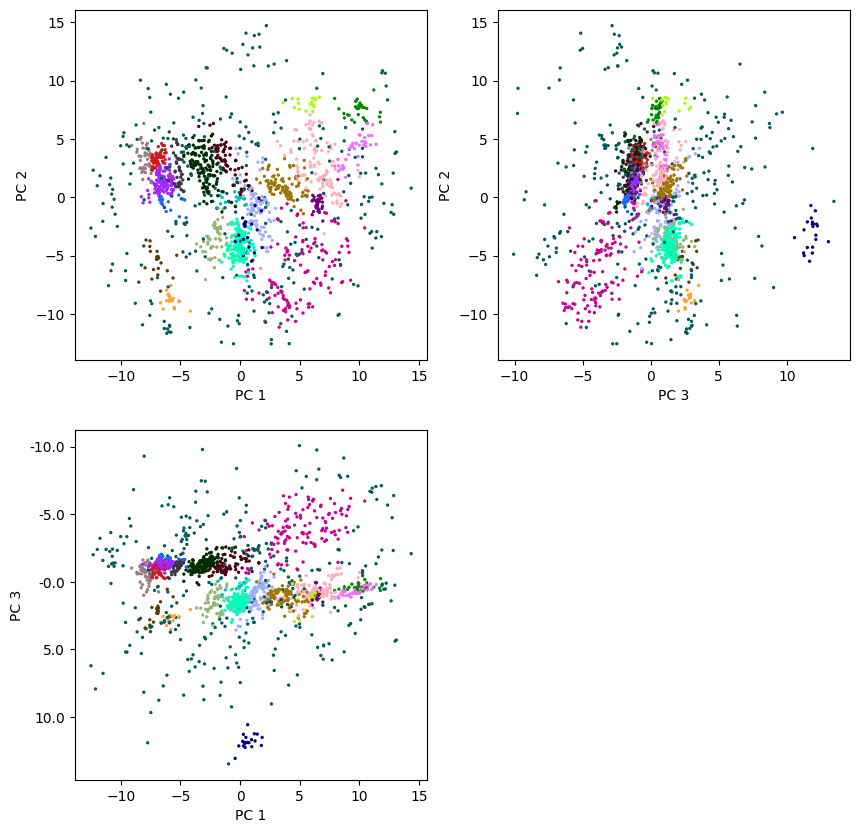

In [101]:
plot_components(bed_ladder_fw, labs_bed, marker_sz=2)

In [106]:
# margin scale 20 min_cluster_sz 10
kers_bed, labs_bed = run_fault_reconstruction(bed_ladder_fw, min_sz_cluster = 10, refit_kernels=True, margin_scale=20, visualize=False)

Processing chunk 1/1 with 1624 points
  Running in parallel
  95/1830 pairs have touching bbox
  Merged 12 pairs  >> 49 kernels left
  73/541 pairs have touching bbox
  Merged 7 pairs  >> 42 kernels left
  53/288 pairs have touching bbox
  Merged 6 pairs  >> 36 kernels left
  37/211 pairs have touching bbox
  Merged 8 pairs  >> 28 kernels left
  27/191 pairs have touching bbox
  Merged 2 pairs  >> 26 kernels left
  12/50 pairs have touching bbox
  Merged 2 pairs  >> 24 kernels left
  11/46 pairs have touching bbox
  Merged 3 pairs  >> 21 kernels left
  12/57 pairs have touching bbox
  Merged capacity kernels into 21 kernels
Combine results of all chunks
  24/210 pairs have touching bbox
  Merged 1 pairs  >> 20 kernels left
  4/19 pairs have touching bbox
Final number of kernels: 20


(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: xlabel='PC 1', ylabel='PC 2'>,
         <Axes: xlabel='PC 3', ylabel='PC 2'>],
        [<Axes: xlabel='PC 1', ylabel='PC 3'>, <Axes: >]], dtype=object))

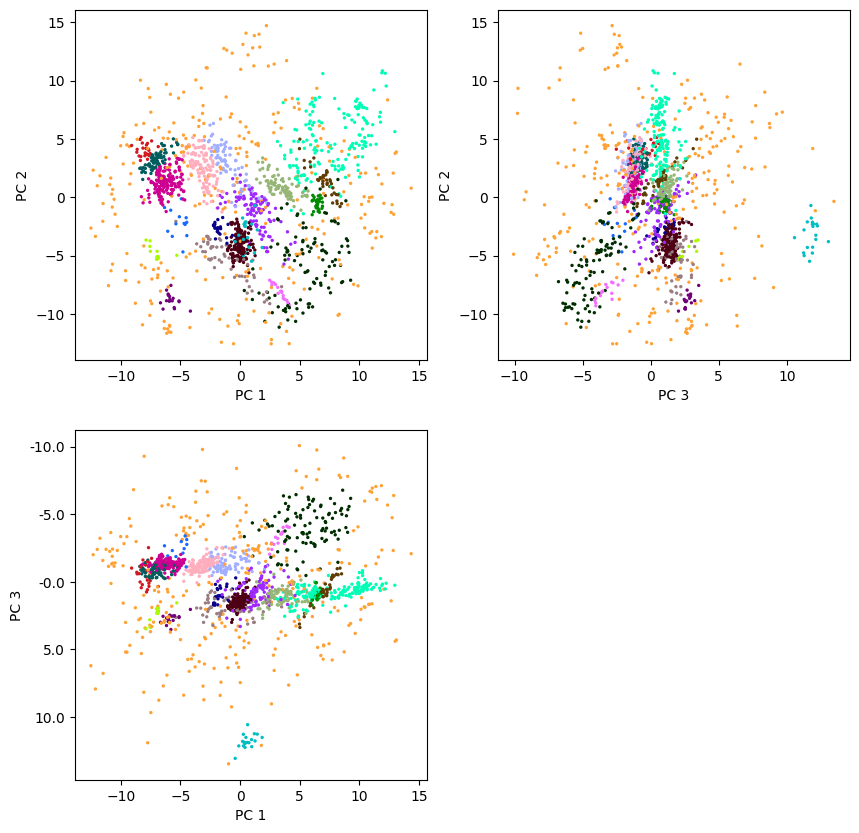

In [107]:
plot_components(bed_ladder_fw, labs_bed, marker_sz=2)

## Y-Fault

In [117]:
kers_yf_ka, labs_yf_ka = run_fault_reconstruction(bed_yfaults, min_sz_cluster = 40, verbose = True, n_chunks = 3)

Processing chunk 1/3 with 3966 points
  Fit 42 Gaussian and 1 background kernels
  Removed 2/43 kernels with < 40 points
  BIC: 31898.500252634276
  77/820 pairs have touching bbox
  Max gain: 218.34207266761223
  Removed 28/77 candidate pairs with negative gain
  Merged 8 pairs  >> 33 kernels left
  BIC: 31317.346737033567
  62/246 pairs have touching bbox
  Max gain: 302.4634008033863
  Removed 22/62 candidate pairs with negative gain
  Merged 3 pairs  >> 30 kernels left
  BIC: 30954.841048836737
  46/98 pairs have touching bbox
  Max gain: 119.40628997508611
  Removed 28/46 candidate pairs with negative gain
  Merged 5 pairs  >> 25 kernels left
  BIC: 30732.029318590678
  34/113 pairs have touching bbox
  Max gain: 27.89836471317176
  Removed 27/34 candidate pairs with negative gain
  Merged 3 pairs  >> 22 kernels left
  BIC: 30654.634648045227
  23/60 pairs have touching bbox
  Max gain: 130.21612243117852
  Removed 18/23 candidate pairs with negative gain
  Merged 2 pairs  >> 20 k

In [118]:
make_3D_plot(bed_yfaults, labs_yf_ka, marker_sz = 1)

(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: xlabel='PC 1', ylabel='PC 2'>,
         <Axes: xlabel='PC 3', ylabel='PC 2'>],
        [<Axes: xlabel='PC 1', ylabel='PC 3'>, <Axes: >]], dtype=object))

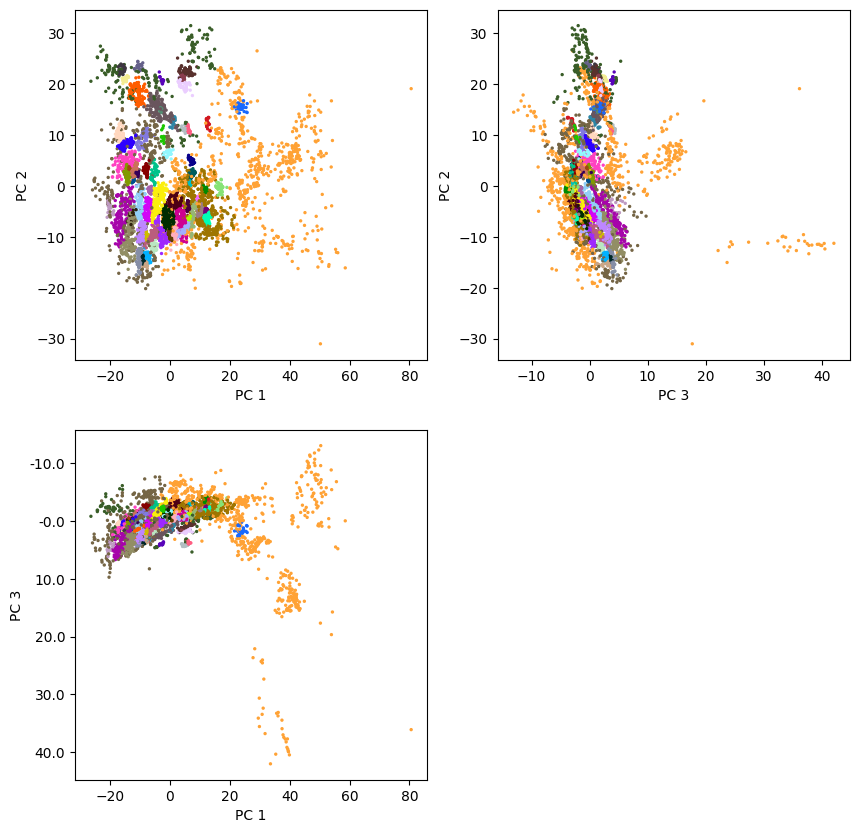

In [114]:
plot_components(bed_yfaults, labs_yf_ka, marker_sz=2)